Import important libraries

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

Loading the data set

In [6]:
sales_data=pd.read_csv('advertising.csv')

In [7]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Understanding the data sets

In [8]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [9]:
print(sales_data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


Data cleaning

In [10]:
duplicate_rows = sales_data[sales_data.duplicated()]
print(duplicate_rows.sum())
# Remove duplicate rows
#df = df.drop_duplicates()

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64


In [11]:
sales_data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
#sales_data.dropna(inplace=True)


Descriptive Analysis

In [13]:
print(sales_data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


Data Visualization

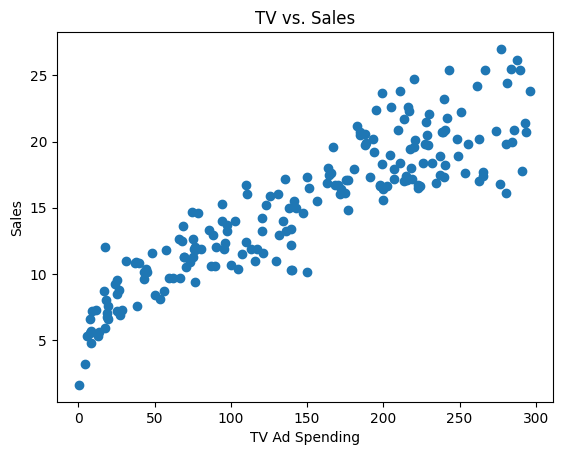

In [14]:
plt.scatter(sales_data['TV'], sales_data['Sales'])
plt.xlabel('TV Ad Spending')
plt.ylabel('Sales')
plt.title('TV vs. Sales')
plt.show()


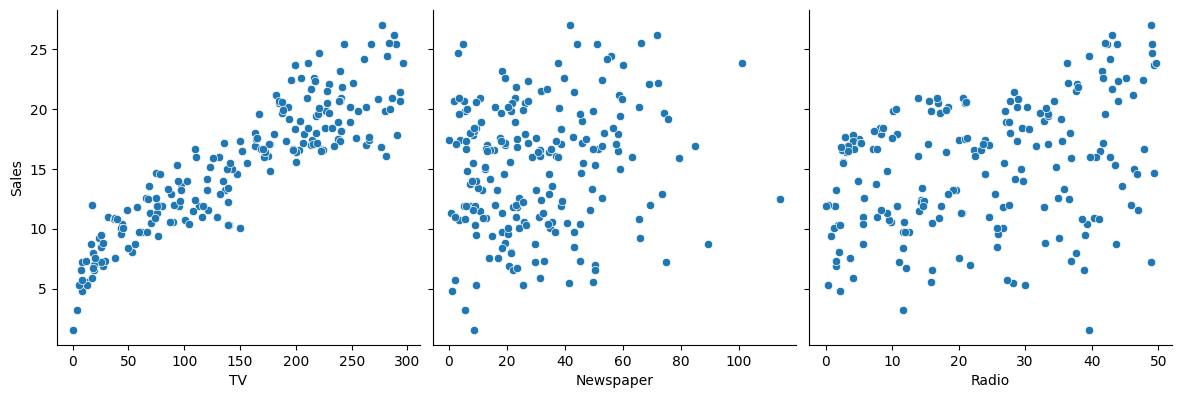

In [15]:
sns.pairplot(sales_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

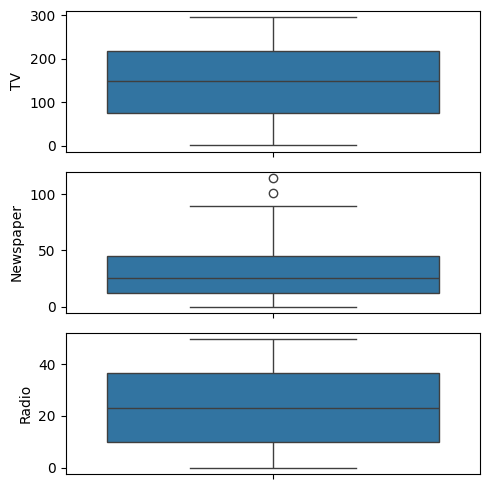

In [16]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(sales_data['TV'], ax = axs[0])
plt2 = sns.boxplot(sales_data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(sales_data['Radio'], ax = axs[2])
plt.tight_layout()

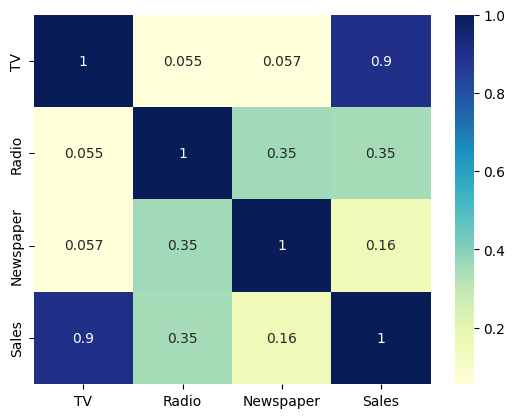

In [17]:
sns.heatmap(sales_data.corr(), cmap="YlGnBu", annot = True)#find correalation
plt.show()

In [76]:
X = sales_data[['TV', 'Radio', 'Newspaper']]
y = sales_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [77]:
X_train.head()

,TV,Radio,Newspaper
97,184.9,21.0,22.0
157,149.8,1.3,24.3
68,237.4,27.5,11.0
55,198.9,49.4,60.0
186,139.5,2.1,26.6


In [78]:
 y_train.head()

97     20.5
157    10.1
68     18.9
55     23.7
186    10.3
Name: Sales, dtype: float64

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MAE: 1.1729154261464299
MSE: 2.1076812918019785
R-squared: 0.9331088069223819
